# Тестирование гипотез

В следующих примерах представлены произвольные случайно подобранные данные. Вы можете заменить их своими значениями и провести тестирование гипотез.

## Гипотеза о нормальности

Большое количество тестов часто предполагает нормальность распределения наших данных, поэтому предварительное тестирование на нормальность может быть необходимо.
Тестов, проверяющих на нормальность много, самый популярный — **тест Шапиро-Уилка**.

Предположение:
*  Наблюдения в каждой выборке независимы и одинаково распределены (iid)

Интерпретация:
*  $H_{0}$: выборка имеет нормальное распределение.
*  $H_{1}$: выборка не имеет нормального распределения.


**Пример.** Проверим произвольно загруженные данные на нормальное распределение.


In [1]:
from scipy.stats import shapiro

data = [0.09, 0.61, 0.44, 0.82, 0.55, 0.39, 0.17, 0.84, 0.1, 0.97]

stat, p = shapiro(data)

print('stat = %.3f, p = %.3f' % (stat, p))

if p > 0.05:
  print('Данные скорее всего распределены нормально.')
else:
  print('Данные скорее всего распределены не нормально.')


stat = 0.932, p = 0.469
Данные скорее всего распределены нормально.


## Гипотеза о равенстве дисперсий

Также большое количество тестов предполагает равенство дисперсий между двумя выборками (параметрические тесты).
Другие не делают такого предположения (непараметрические тесты).
Один из вариантов проверки — **тест Левена**.

Интерпретация:
*   $H_{0}$: две выборки имеют одинаковые дисперсии.
*   $H_{1}$: две выборки имеют разные дисперсии.


**Пример.** Проверим, являются ли дисперсии двух выборок данных одинаковыми.

In [9]:
from scipy.stats import levene

group_1 = [76, 72, 72, 10, 50, 31, 5, 70, 88, 5]
group_2 = [74, 56, 43, 11, 90, 16, 95, 38, 64, 8]

alpha = 0.05

stat, p = levene(group_1,group_2, center ='mean')

print('stat = %.3f, p = %.3f' % (stat, p))

if p > alpha :
  print("Дисперсии двух выборок скорее одинаковы.")
else:
  print("Дисперсии двух выборок скорее различны.")

stat = 0.081, p = 0.780
Дисперсии двух выборок скорее одинаковы.


## T-тест Стьюдента

T-тест Стьюдента проверяет, существенно ли различаются средние значения двух независимых выборок.

Предположения:
*   Наблюдения в каждой выборке независимы и одинаково распределены.
*   Наблюдения в каждой выборке распределены нормально.
*   Наблюдения в каждой выборке имеют одинаковую дисперсию.

Интерпретация:
*   $H_{0}$: средние значения выборок равны.
*   $H_{1}$: средние значения выборок не равны.

**Пример.** Проверим данные двух **независимых** выборок с использованием t-теста Стьюдента.

In [3]:
import numpy as np

In [4]:
# Исходные выборки
data1 = np.array([47, 41, 13, 72, 58, 88, 73, 15, 55, 12, 20, 26, 100, 39, 28, 87, 60, 91, 13, 50])
data2 = np.array([53, 49, 2, 3, 12, 30, 50, 66, 36, 36, 91, 15, 70, 83])

Предварительный анализ — проверка нормальности распределений.

In [5]:
from scipy import stats

In [10]:
stat_1, p_1 = stats.shapiro(data1)

print("p-value = %.4f" % p_1)

if p_1 <0.05:
  print("Отвергаем нулевую гипотезу, данные не нормальны.")
else:
  print("Не отвергаем нулевую гипотезу, данные нормальны.")

p-value = 0.1713
Не отвергаем нулевую гипотезу, данные нормальны.


In [11]:
stat_2, p_2 = stats.shapiro(data2)

print("p-value = %.4f" % p_2)

if p_2 <0.05:
  print("Отвергаем нулевую гипотезу, данные не нормальны.")
else:
  print("Не отвергаем нулевую гипотезу, данные нормальны.")

p-value = 0.6797
Не отвергаем нулевую гипотезу, данные нормальны.


Предварительный анализ — проверка равенства дисперсий.

In [12]:
stat_var, p_var = stats.levene(data1, data2)

print("p-value = %.4f" % p_var)

if p_var < 0.05:
  print("Отвергаем нулевую гипотезу, дисперсии выборок различны.")
else:
  print("Не отвергаем нулевую гипотезу, дисперсии выборок одинаковы.")

p-value = 0.9137
Не отвергаем нулевую гипотезу, дисперсии выборок одинаковы.


***Нулевая гипотеза:*** нет различий в средних между выборками.

***Альтернативная гипотеза:*** есть различия в средних между выборками.


In [18]:
ttest, p_value = stats.ttest_ind(data1, data2)

print("p-value = %.8f" % p_value)
print("Одностороння гипотеза >> делим p-value на 2 >> односторонний p-value = %.4f" %(p_value/2))

if p_value/2 < 0.05:
	print("Отвергаем нулевую гипотезу, средние выборок различны.")
else:
	print("Не отвергаем нулевую гипотезу, средние выборок одинаковы.")

p-value = 0.50002513
Одностороння гипотеза >> делим p-value на 2 >> односторонний p-value = 0.2500
Не отвергаем нулевую гипотезу, средние выборок одинаковы.


## Парный t-тест Стьюдента

Парный t-тест Стьюдента проверяет, существенно ли различаются средние значения двух парных выборок.

Предположения:
* Наблюдения в каждой выборке независимы и одинаково распределены.
* Наблюдения в каждой выборке распределены нормально.
* Наблюдения в каждой выборке имеют одинаковую дисперсию.
* Наблюдения двух выборок являются парными

Интерпретация:
* $H_{0}$: средние значения выборок равны.
* $H_{1}$: средние значения выборок не равны.


**Пример.** Проверим данные двух выборок (до и после) с использованием парного t-теста Стьюдента.

In [15]:
data_before = [7, 8, 4, 10, 5, 6, 10, 3]
data_after = [2, 2, 7, 10, 10, 10, 8, 1]

In [19]:
test_stat, p_value_paired = stats.ttest_rel(data_before, data_after)

print("p-value = %.6f" % p_value_paired , "односторонний p-value = %.6f" %(p_value_paired/2))

if p_value_paired < 0.05:
	print("Отвергаем нулевую гипотезу, средние выборок различны.")
else:
	print("Не отвергаем нулевую гипотезу, средние выборок одинаковы.")

p-value = 0.803477 односторонний p-value = 0.401739
Не отвергаем нулевую гипотезу, средние выборок одинаковы.


Мы рассмотрели два теста:
* Равенство дисперсий — независимые выборки.
* Равенство дисперсии — парные выборки.

В случае если условие равенства дисперсий не удовлетворено, будем использовать другие тесты:
* Независимые выборки — тест Манна-Уитни `mannwhitneyu(data1, data2)`.
* Парные выборки — тест Уилкоксона `wilcoxon(data1, data2)`.


## Гипотеза о корреляции

Стандартизированной мерой взаимосвязи переменных является корреляция.

Корреляция измеряется от —1 до 1:
* Если коэффициент положителен, то переменные имеют положительную взаимосвязь.
* Если коэффициент отрицателен — обратную взаимосвязь.

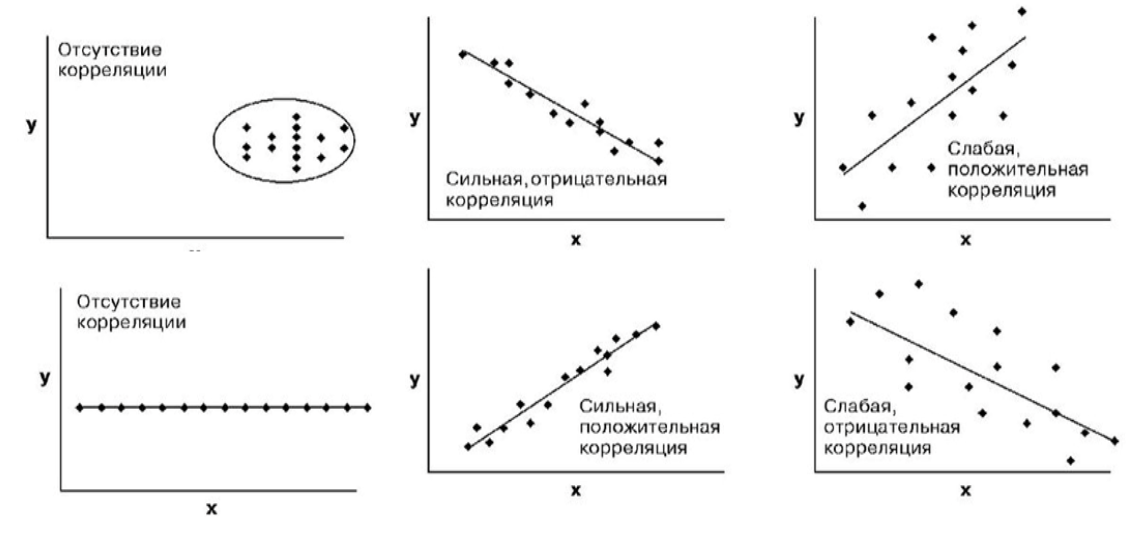

Для проверки гипотезы корреляции есть два популярных теста — на значимость корреляции Пирсона (случай равных дисперсий и нормальности данных) и Спирмана (без этих предположений):
* $H_{0}$: две выборки независимы.
* $H_{1}$: существует зависимость между переменными.


**Пример.** Проверим наличие корреляции между двумя переменными.

In [20]:
x = [46, 92, 40, 88, 94, 20, 10, 4, 98, 52, 35, 90]
y = [50, 81, 81, 7, 46, 58, 22, 97, 17, 15, 51, 65]

In [22]:
from scipy.stats import pearsonr, spearmanr

Тест Пирсона:

In [24]:
stat, p = pearsonr(x, y)

print('stat = %.3f, p = %.3f' % (stat, p))

if p > 0.05:
 print('Переменные независимы.')
else:
 print('Переменные зависимы.')

stat = -0.275, p = 0.386
Переменные независимы.


Тест Спирмана:

In [25]:
stat, p = spearmanr(x, y)

print('stat = %.3f, p = %.3f' % (stat, p))

if p > 0.05:
 print('Переменные независимы.')
else:
 print('Переменные зависимы.')

stat = -0.333, p = 0.291
Переменные независимы.
